In [41]:
## importing the required libraries, all the libs from qiskit and then numpy and matplotlib

from qiskit import *
import numpy as np
import matplotlib as plt

In [42]:
##initializing the circuit with 2 qubits in the quantum register and 2 in the classical register

qr = QuantumRegister(2,'q0')
cr = ClassicalRegister(2,'c0')
circ = QuantumCircuit(qr,cr)

## specifying the gates needed for the singlet state
#first the x-gate on qubit 1 so that when we act on it with a hadamard later we get a negative
#infront of the |1> 

circ.x(qr[0])
circ.barrier()  ## barrier just for visual convenience 

## a hadamard gate on qubit 1 to put it in a superposition
circ.h(qr[0])
circ.barrier()

## a cnot gate with qubit 1 as control and qubit 2 as target
circ.cx(qr[0], qr[1])
circ.barrier()

## an X gate on qubit 2 to flip the 2nd qubit in the resulting |00> -|11> into |10> -|01>
##NB: Qiskit reverses the order of qubits so |01> means the first qubit is 1 and second 0

circ.x(qr[0])
circ.barrier()


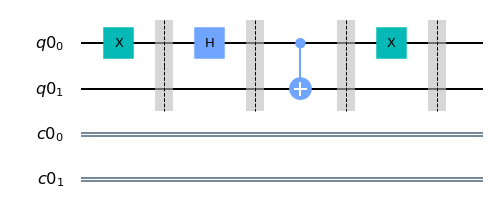

In [43]:
## printing out the circuit in the matplotlib format

circ.draw(output='mpl',cregbundle=False)

In [44]:
## adding measurements from qubit 1 and 2 to classical register bits c1 and c2  
circ.measure(qr,cr)

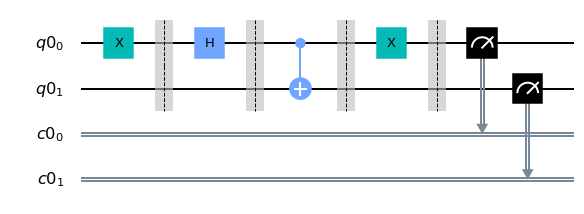

In [45]:
circ.draw(output='mpl',cregbundle=False)

In [46]:
## specifying the simulator, we will use the Qasm simulator form the Aer Qiskit package

sim = Aer.get_backend('qasm_simulator')

#############################################


In [47]:
## run the circuit 'circ' on the Qasm simulator 'sim' storing the results in the "rslt" object
rslt = execute(circ, backend = sim).result()

In [48]:
#for informative visualization of results we can use qiskit visualization tools but first need
# to import the required tool:

from qiskit.tools.visualization import plot_histogram

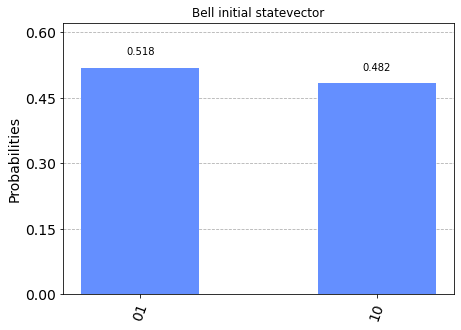

In [49]:
## plotting a histogram of the measurements made by the circuit

plot_histogram(rslt.get_counts(circ),title="Bell initial statevector")

In [50]:
## another circuit just to show how one can get the state vector resulting from the circuit
##(before measurments)


q = QuantumRegister(2) 
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)


## specifying the gates needed for the singlet state (same circuit as before)

qc.x(q[0])
qc.barrier()
qc.h(q[0])
qc.barrier()
qc.cx(q[0], q[1])
qc.barrier()
qc.x(q[1])


## this time we use the Statevector Simulator istead of Qasm, since we need the statevector

backend = Aer.get_backend('statevector_simulator')
result = qiskit.execute(qc, backend=backend).result()
output = result.data(qc)
   
 

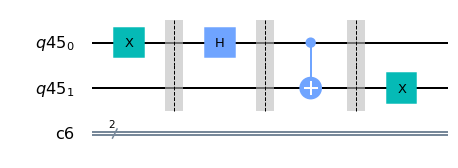

In [51]:
## obviosuly the same circuit but without the measurment step

qc.draw(output = 'mpl')

In [53]:
## the state vector results were stored in 'output' so we print them out we clearly see the
#amplitude of every basis state and it's 0 for the first and last basis vector and -1/sqrt 2 for 
#the |01> and +1/sqrt 2 for |01>  (remember Qiskit reverses order of qubits) which 
#corresponds to a singlet state.

print(output)

{'counts': {'0x0': 1}, 'statevector': array([ 0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j,
        0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j])}
